
# **Preparação do ambiente com instalação de pacotes necessários ao projeto**


In [3]:
!pip install gym[all] box2d-py numpy tqdm pyvirtualdisplay --quiet

**Preâmbulo do projeto**

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from pyvirtualdisplay import Display
from tqdm import tqdm

**Inicialização do projeto**

In [5]:
Display().start()
env = gym.make('CartPole-v0')
state = env.reset()

/home/wasf84/.local/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/wasf84/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/wasf84/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**Demonstração da inicialização do projeto**

In [6]:
print(f"""
Posição do carrinho:\t\t {state[0]}
Velocidade do carrinho:\t\t {state[1]}
Ângulo do mastro:\t\t {state[2]}
Velocidade angular do mastro:\t {state[3]}
""")


Posição do carrinho:		 0.02741161733865738
Velocidade do carrinho:		 -0.04663488268852234
Ângulo do mastro:		 0.005233966279774904
Velocidade angular do mastro:	 0.047578949481248856



/home/wasf84/.local/lib/python3.10/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


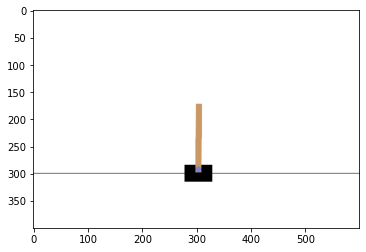

In [7]:
img = plt.imshow(env.render("rgb_array"))

In [8]:
# Classe Agente para criação das políticas que controlarão o carrinho

class Agente(object):
    def __init__(self):
        # Método de inicialização do objeto
        pass
    
    def __repr__(self):
        # Método para quando chamar 'print(agente)'
        pass
    
    def action(self, st):
        # Método que vai escolher qual a melhor ação para controlar o carrinho
        
        if st[2] < 0:
            return 0
        else:
            return 1

In [9]:
qtd_episodios = 1000
rewards = []
ag = Agente()
#----------------------------#
for _ in tqdm(range(qtd_episodios)):
    done = False
    state = env.reset()
    reward = []
    while not done:
        #action = env.action_space.sample()
        action = ag.action(state)
        state, r, done, info = env.step(action)
        reward.append(r)
    env.close()
    rewards.append(sum(reward))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2045.66it/s]


**Plotando o histograma**

Explicando o gráfico:
- o eixo y é a quantidade de episódios
- o eixo x mostra a quantidade de movimentos feita antes do episódio encerrar (por erro ou por atingir o limite - explicado na página do CartPole)

(array([ 64.,  33., 241., 233., 152., 147.,  66.,  43.,  16.,   5.]),
 array([24. , 28.7, 33.4, 38.1, 42.8, 47.5, 52.2, 56.9, 61.6, 66.3, 71. ]),
 <BarContainer object of 10 artists>)

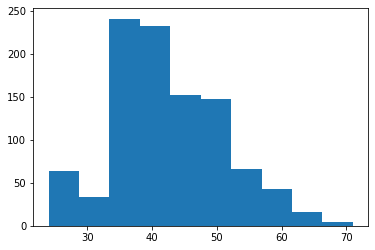

In [10]:
rewards = np.array(rewards)
plt.hist(rewards)